<a href="https://colab.research.google.com/github/VinothiniRamsingh/Analysing-consumer-complaints/blob/main/kb_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/complaints.csv')
print(df)

        Date received                                            Product  \
0          2023-08-24  Credit reporting, credit repair services, or o...   
1          2023-08-25  Credit reporting or other personal consumer re...   
2          2023-07-13                        Checking or savings account   
3          2023-09-04  Money transfer, virtual currency, or money ser...   
4          2023-09-13  Credit reporting or other personal consumer re...   
...               ...                                                ...   
4069696    2015-02-21                                        Credit card   
4069697    2015-07-19                                   Credit reporting   
4069698    2022-06-16                                           Mortgage   
4069699    2022-04-26                                    Debt collection   
4069700    2022-08-15                        Checking or savings account   

                        Sub-product  \
0                  Credit reporting   
1        

#Explanatory Data Analysis and Feature Engineering

In [ ]:
# Data Summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069701 entries, 0 to 4069700
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 558.

In [ ]:
print(df.head)

<bound method NDFrame.head of         Date received                                            Product  \
0          2023-08-24  Credit reporting, credit repair services, or o...   
1          2023-08-25  Credit reporting or other personal consumer re...   
2          2023-07-13                        Checking or savings account   
3          2023-09-04  Money transfer, virtual currency, or money ser...   
4          2023-09-13  Credit reporting or other personal consumer re...   
...               ...                                                ...   
4069696    2015-02-21                                        Credit card   
4069697    2015-07-19                                   Credit reporting   
4069698    2022-06-16                                           Mortgage   
4069699    2022-04-26                                    Debt collection   
4069700    2022-08-15                        Checking or savings account   

                        Sub-product  \
0                 

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        716338
Consumer complaint narrative    2596125
Company public response         2186796
Company                               0
State                             43209
ZIP code                          30212
Tags                            3644222
Consumer consent provided?       902709
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3301343
Complaint ID                          0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


In [ ]:
df['Date received']

84094      2017-01-20
84408      2017-03-29
84708      2017-03-29
87339      2017-04-05
89818      2015-12-03
              ...    
4055648    2016-05-01
4056162    2015-04-07
4056898    2015-05-14
4058607    2015-07-14
4058994    2016-10-19
Name: Date received, Length: 3120, dtype: object

In [ ]:
df['Product']

84094      Debt collection
84408      Debt collection
84708      Debt collection
87339      Debt collection
89818      Debt collection
                ...       
4055648    Debt collection
4056162    Debt collection
4056898    Debt collection
4058607    Debt collection
4058994       Student loan
Name: Product, Length: 3120, dtype: object

In [ ]:
df['Sub-product']

84094                              I do not know
84408                                   Mortgage
84708                              I do not know
87339                                Credit card
89818      Other (i.e. phone, health club, etc.)
                           ...                  
4055648                              Credit card
4056162                            I do not know
4056898    Other (i.e. phone, health club, etc.)
4058607                            I do not know
4058994                 Non-federal student loan
Name: Sub-product, Length: 3120, dtype: object

In [ ]:
df['Issue']

84094      Cont'd attempts collect debt not owed
84408      Cont'd attempts collect debt not owed
84708                      Communication tactics
87339            Disclosure verification of debt
89818      Cont'd attempts collect debt not owed
                           ...                  
4055648       False statements or representation
4056162    Cont'd attempts collect debt not owed
4056898                    Communication tactics
4058607    Cont'd attempts collect debt not owed
4058994       Dealing with my lender or servicer
Name: Issue, Length: 3120, dtype: object

In [ ]:
df['Sub-issue']

84094                           Debt is not mine
84408                              Debt was paid
84708                 Frequent or repeated calls
87339       Right to dispute notice not received
89818                           Debt is not mine
                           ...                  
4055648        Attempted to collect wrong amount
4056162                            Debt was paid
4056898               Frequent or repeated calls
4058607                         Debt is not mine
4058994    Trouble with how payments are handled
Name: Sub-issue, Length: 3120, dtype: object

In [ ]:
df['Consumer complaint narrative']

84094      Received a phone call from XXXX, WA ( XXXX ), ...
84408      In XX/XX/XXXX, USAA FEDERAL SAVINGS BANK accep...
84708      Hunter Warfield has continued to contact me re...
87339      After reviewing my credit report with all XXXX...
89818      To whom it may concernMy name is XXXX XXXX XXX...
                                 ...                        
4055648    There is so much malfeasance with XXXX nationa...
4056162    This is Part XXXX of case number XXXX.SunTrust...
4056898                                constant robo calling
4058607    Almost daily phone calls from Stellar Recovery...
4058994    On XXXX XXXX, XXXX, I submitted a CFPB complai...
Name: Consumer complaint narrative, Length: 3120, dtype: object

In [ ]:
df['Company public response']

84094      Company believes complaint is the result of an...
84408      Company believes complaint is the result of an...
84708      Company believes the complaint is the result o...
87339      Company believes it acted appropriately as aut...
89818      Company believes it acted appropriately as aut...
                                 ...                        
4055648    Company believes it acted appropriately as aut...
4056162     Company chooses not to provide a public response
4056898    Company disputes the facts presented in the co...
4058607    Company can't verify or dispute the facts in t...
4058994    Company has responded to the consumer and the ...
Name: Company public response, Length: 3120, dtype: object

In [ ]:
df['Company']

84094                        GMA Investments, LLC
84408      UNITED SERVICES AUTOMOBILE ASSOCIATION
84708                             HW Holding, Inc
87339      UNITED SERVICES AUTOMOBILE ASSOCIATION
89818                         The CMI Group, Inc.
                            ...                  
4055648           Capital Management Services, LP
4056162                      SUNTRUST BANKS, INC.
4056898         Financial Recovery Services, Inc.
4058607                    Stellar Recovery, Inc.
4058994                          ECMC GROUP, INC.
Name: Company, Length: 3120, dtype: object

In [ ]:
df['State']

84094      WA
84408      FL
84708      NM
87339      CA
89818      NM
           ..
4055648    MD
4056162    NC
4056898    FL
4058607    MI
4058994    CA
Name: State, Length: 3120, dtype: object

In [ ]:
df['ZIP code']

84094      98108
84408      32174
84708      87109
87339      95628
89818      87123
           ...  
4055648    20910
4056162    XXXXX
4056898    335XX
4058607    48080
4058994    95409
Name: ZIP code, Length: 3120, dtype: object

In [ ]:
df['Tags']

84094                      Servicemember
84408      Older American, Servicemember
84708                      Servicemember
87339                      Servicemember
89818      Older American, Servicemember
                       ...              
4055648                   Older American
4056162                   Older American
4056898                   Older American
4058607                   Older American
4058994                    Servicemember
Name: Tags, Length: 3120, dtype: object

In [ ]:
df['Consumer consent provided?']

84094      Consent provided
84408      Consent provided
84708      Consent provided
87339      Consent provided
89818      Consent provided
                 ...       
4055648    Consent provided
4056162    Consent provided
4056898    Consent provided
4058607    Consent provided
4058994    Consent provided
Name: Consumer consent provided?, Length: 3120, dtype: object

In [ ]:
df['Submitted via']

84094      Web
84408      Web
84708      Web
87339      Web
89818      Web
          ... 
4055648    Web
4056162    Web
4056898    Web
4058607    Web
4058994    Web
Name: Submitted via, Length: 3120, dtype: object

In [ ]:
df['Date sent to company']

84094      2017-03-24
84408      2017-03-30
84708      2017-03-29
87339      2017-04-05
89818      2015-12-03
              ...    
4055648    2016-05-01
4056162    2015-04-07
4056898    2015-05-14
4058607    2015-07-14
4058994    2016-10-21
Name: Date sent to company, Length: 3120, dtype: object

In [ ]:
df['Company response to consumer']

84094              Closed with explanation
84408      Closed with non-monetary relief
84708      Closed with non-monetary relief
87339              Closed with explanation
89818      Closed with non-monetary relief
                        ...               
4055648            Closed with explanation
4056162            Closed with explanation
4056898            Closed with explanation
4058607            Closed with explanation
4058994            Closed with explanation
Name: Company response to consumer, Length: 3120, dtype: object

In [ ]:
df['Timely response?']

84094      Yes
84408      Yes
84708      Yes
87339      Yes
89818      Yes
          ... 
4055648    Yes
4056162    Yes
4056898    Yes
4058607    Yes
4058994    Yes
Name: Timely response?, Length: 3120, dtype: object

In [ ]:
df['Consumer disputed?']

84094       No
84408       No
84708       No
87339      Yes
89818       No
          ... 
4055648     No
4056162    Yes
4056898     No
4058607    Yes
4058994    Yes
Name: Consumer disputed?, Length: 3120, dtype: object

In [ ]:
df['Complaint ID']

84094      2298566
84408      2409999
84708      2408846
87339      2422117
89818      1681848
            ...   
4055648    1904218
4056162    1320372
4056898    1375699
4058607    1467052
4058994    2167820
Name: Complaint ID, Length: 3120, dtype: int64

In [ ]:
print('rows, columns: ',df.shape)

rows, columns:  (3120, 18)


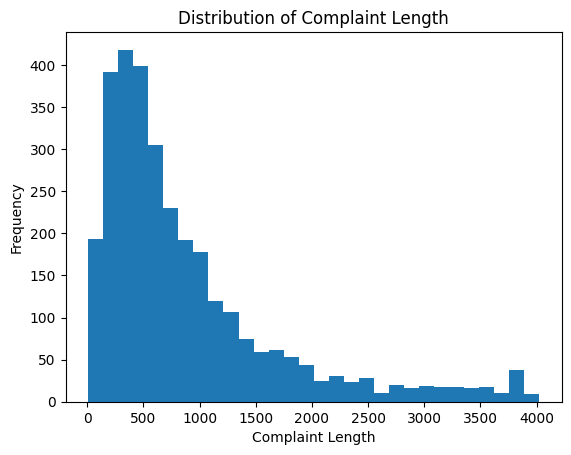

In [ ]:
#Histogram of complaint lengths
import matplotlib.pyplot as plt

plt.hist(df['Consumer complaint narrative'].str.len(), bins=30)
plt.xlabel('Complaint Length')
plt.ylabel('Frequency')
plt.title('Distribution of Complaint Length')
plt.show()


In [ ]:
# Convert 'Date received' to datetime format
df['Date received'] = pd.to_datetime(df['Date received'])

# Time Analysis
df['Year'] = df['Date received'].dt.year
df['Month'] = df['Date received'].dt.month


#Text Pre-Processing

Stopwords removal, url remover, stemming, lemmatization, tokenization, convert numbers to words, tokenization, unigram/bigram approach

In [ ]:
!pip3 install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install num2words

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from num2words import num2words
from nltk.util import ngrams

In [ ]:
def remove_stopwords(text):
 stop_words = set(stopwords.words('english'))
 words = word_tokenize(text)
 filtered_words = [word for word in words if word.lower() not in stop_words]
 return ' '.join(filtered_words)

def remove_url(text):
 return re.sub(r"http\S+", "", text)

def stemming(text):
 stemmer = PorterStemmer()
 words = word_tokenize(text)
 stemmed_words = [stemmer.stem(word) for word in words]
 return ' '.join(stemmed_words)

def lemmatization(text):
 lemmatizer = WordNetLemmatizer()
 words = word_tokenize(text)
 lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
 return ' '.join(lemmatized_words)

def convert_numbers(text):
 words = word_tokenize(text)
 new_words = []
 for word in words:
  if word.isnumeric():
   new_words.append(num2words(word))
  else:
   new_words.append(word)
 return ' '.join(new_words)

def tokenize(text):
 return ' '.join(word_tokenize(text))

def ngrams_approach(text):
 words = word_tokenize(text)
 unigrams = words
 bigrams = ngrams(words, 2)
 unigrams_str = ' '.join(unigrams)
 bigrams_str = ['_'.join(bigram) for bigram in bigrams]
 return unigrams_str + ' ' + ' '.join(bigrams_str)

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(remove_stopwords)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(stemming)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lemmatization)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(convert_numbers)
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(tokenize)

In [ ]:
df['Product'] = df['Product'].apply(remove_stopwords)
df['Product'] = df['Product'].apply(remove_url)
df['Product'] = df['Product'].apply(stemming)
df['Product'] = df['Product'].apply(lemmatization)
df['Product'] = df['Product'].apply(convert_numbers)
df['Product'] = df['Product'].apply(tokenize)

In [ ]:
df['Product']

84094      debt collect
84408      debt collect
84708      debt collect
87339      debt collect
89818      debt collect
               ...     
4055648    debt collect
4056162    debt collect
4056898    debt collect
4058607    debt collect
4058994    student loan
Name: Product, Length: 3120, dtype: object

In [ ]:
df['Sub-product'] = df['Sub-product'].apply(remove_stopwords)
df['Sub-product'] = df['Sub-product'].apply(remove_url)
df['Sub-product'] = df['Sub-product'].apply(stemming)
df['Sub-product'] = df['Sub-product'].apply(lemmatization)
df['Sub-product'] = df['Sub-product'].apply(convert_numbers)
df['Sub-product'] = df['Sub-product'].apply(tokenize)

In [ ]:
df['Sub-product']

84094                                       know
84408                                    mortgag
84708                                       know
87339                                credit card
89818      ( i.e . phone , health club , etc . )
                           ...                  
4055648                              credit card
4056162                                     know
4056898    ( i.e . phone , health club , etc . )
4058607                                     know
4058994                   non-feder student loan
Name: Sub-product, Length: 3120, dtype: object

# Feature selection algorithms to extract the predominant features

Information Gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
X = df['Consumer complaint narrative']

In [ ]:
# Define the mapping from original labels to desired labels
category_mapping = {
    'credit reporting, credit repair services, or other personal consumer reports': 0,
    'credit reporting or other personal consumer reports': 0,
    'student loan': 2,
    'debt collection': 1,
    'debt collect' : 1,
    'checking or savings account': 4,
    'credit card or prepaid card': 5,
    'payday loan title loan personal loan or advance loan': 6,
    'money transfer virtual currency or money service': 7,
    'credit card': 8,
    'mortgage': 3,
    'vehicle loan or lease': 9,
    'prepaid card': 10
}

# Creating a new column 'complaint_category' based on 'Product' using the mapping
df['complaint_category'] = df['Product'].map(category_mapping)

In [ ]:
Y= df['complaint_category']

In [ ]:
Y

84094      1
84408      1
84708      1
87339      1
89818      1
          ..
4055648    1
4056162    1
4056898    1
4058607    1
4058994    2
Name: complaint_category, Length: 3120, dtype: int64

In [ ]:
print(Y.isnull().sum())

0


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Apply one-hot encoding to input features (x)
x_encoded = pd.get_dummies(X)

# Apply label encoding to target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

# Calculate the information gain for each feature
information_gains = mutual_info_classif(x_encoded, y_encoded)

# Create a DataFrame to store the feature names and their information gains
feature_info_gain = pd.DataFrame({'Feature': x_encoded.columns, 'Information Gain': information_gains})

# Sort the features based on information gain in descending order
feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)

# Print the feature names and their information gains
print(feature_info_gain)


                                                Feature  Information Gain
661   contact xxxx check foot . told insur network x...          0.013332
476   collect company-t & kirlin bill creditor xxxx ...          0.012493
2680  xx/xx/xxxx-xx/xx/xxxx close account xxxx . tir...          0.012020
1319  know tri collect , xxxx xxxx years.did time tr...          0.011009
1359  letter date xx/xx/xxxx , receiv xx/xx/xxxx ecm...          0.010585
...                                                 ...               ...
1701  peopl call debt never heard . top say xxxx deb...          0.000000
1700  peopl ! leav msg work phone , home phone say e...          0.000000
1697  penn credit xxxx call parent say import messag...          0.000000
1696  penn credit collect call job request payment b...          0.000000
1550              never receiv notif enough info verifi          0.000000

[3101 rows x 2 columns]


Chi-squared test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Convert text data (X) into numerical features
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Apply Chi-squared feature selection to select the top k features
k = 100
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_vectorized, Y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = [vectorizer.get_feature_names_out()[i] for i in selected_indices]

# Create a DataFrame to store the selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Chi2 Score': selector.scores_[selected_indices]})

# Sort the features based on the Chi2 scores in descending order
selected_features_df = selected_features_df.sort_values(by='Chi2 Score', ascending=False)

# Print the selected feature names and their Chi2 scores
print(selected_features_df)


    Feature   Chi2 Score
59     loan  4832.278568
85  student  2434.516595
61      mae  1260.225551
77    salli  1195.069119
39  forbear   892.500472
..      ...          ...
10   assist    60.471144
55     late    59.636657
90    train    59.458949
80     scra    59.458949
89     time    59.078480

[100 rows x 2 columns]


#Selection of Multi Classification model
#Comparison of model performance
#Model Evaluation
#Prediction

**1) Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Fit the classifier on the training data
clf.fit(X_train_tfidf.toarray(), y_train)

# Predict on the test set
y_pred = clf.predict(X_test_tfidf.toarray())

# Print confusion matrix and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)

Classification Report:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       600
           2       0.00      0.00      0.00        24

    accuracy                           0.96       624
   macro avg       0.48      0.50      0.49       624
weighted avg       0.92      0.96      0.94       624

Confusion Matrix:
 [[600   0]
 [ 24   0]]
Accuracy: 96.15384615384616


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


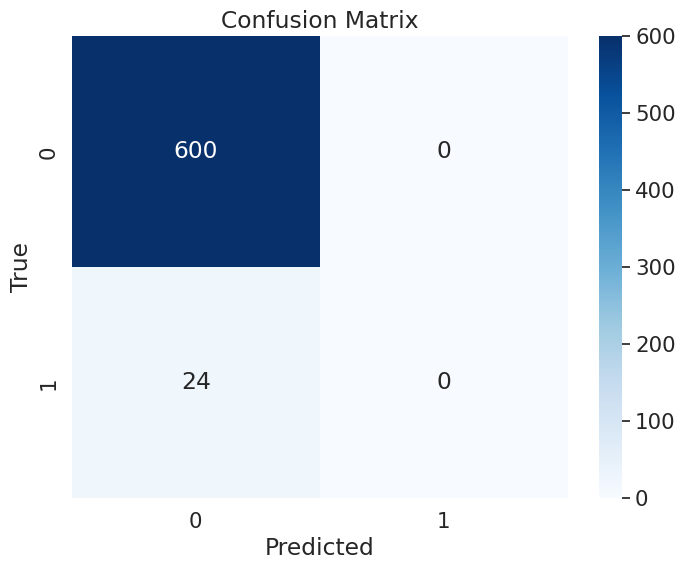

Confusion Matrix:
[[600   0]
 [ 24   0]]
Accuracy
96.15384615384616


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
# Evaluate the model and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy")
print(accuracy_score(y_test, y_pred)*100)

**2) SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy and MCC
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print confusion matrix, accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('Accuracy:', accuracy_svm)

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       600
           2       0.80      0.67      0.73        24

    accuracy                           0.98       624
   macro avg       0.89      0.83      0.86       624
weighted avg       0.98      0.98      0.98       624

Confusion Matrix:
 [[596   4]
 [  8  16]]
Accuracy: 0.9807692307692307


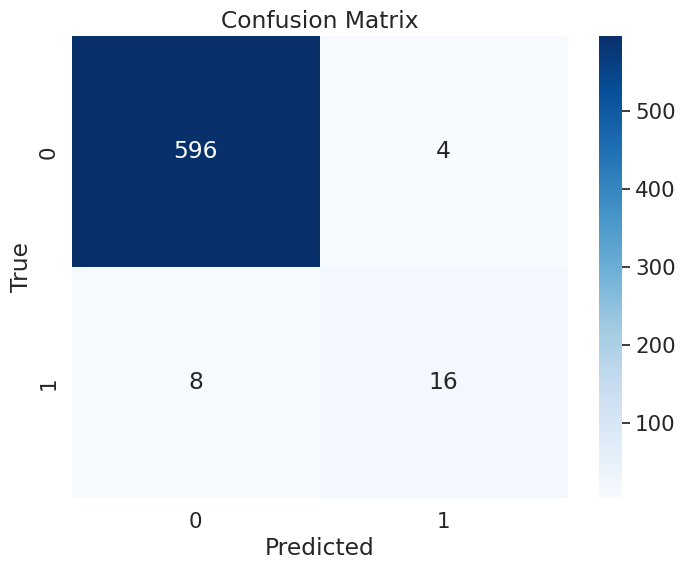

Confusion Matrix:
[[596   4]
 [  8  16]]
Accuracy
98.07692307692307


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
# Evaluate the model and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Accuracy")
print(accuracy_score(y_test, y_pred_svm)*100)

**3) Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_tfidf.toarray(), y_train)

# Predict on the test set
y_pred_gnb = gnb_classifier.predict(X_test_tfidf.toarray())

# Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Print confusion matrix, accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_gnb))
print('Accuracy:', accuracy_gnb)

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.91      0.93       600
           2       0.02      0.04      0.03        24

    accuracy                           0.88       624
   macro avg       0.49      0.47      0.48       624
weighted avg       0.92      0.88      0.90       624

Confusion Matrix:
 [[545  55]
 [ 23   1]]
Accuracy: 0.875


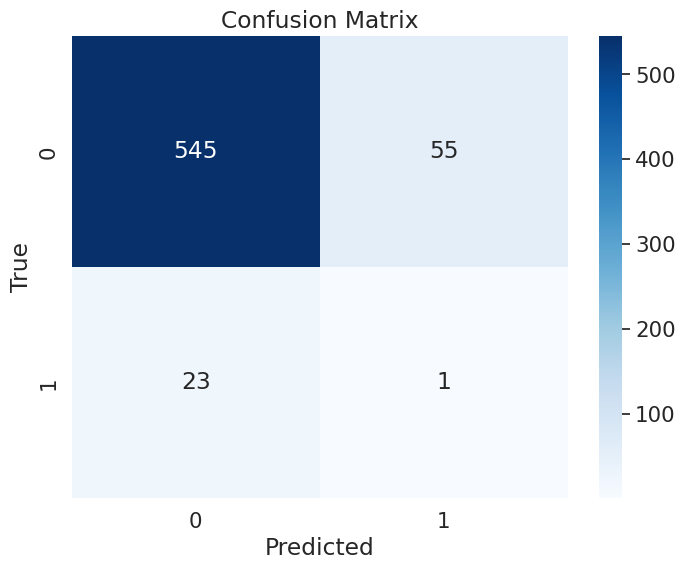

Confusion Matrix:
[[545  55]
 [ 23   1]]
Accuracy
87.5


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
# Evaluate the model and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))
print("Accuracy")
print(accuracy_score(y_test, y_pred_gnb)*100)

**4) Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier with desired parameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy and MCC
accuracy_rf = accuracy_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Print confusion matrix, accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy:', accuracy_rf)

Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       600
           2       1.00      0.25      0.40        24

    accuracy                           0.97       624
   macro avg       0.99      0.62      0.69       624
weighted avg       0.97      0.97      0.96       624

Confusion Matrix:
 [[600   0]
 [ 18   6]]
Accuracy: 0.9711538461538461


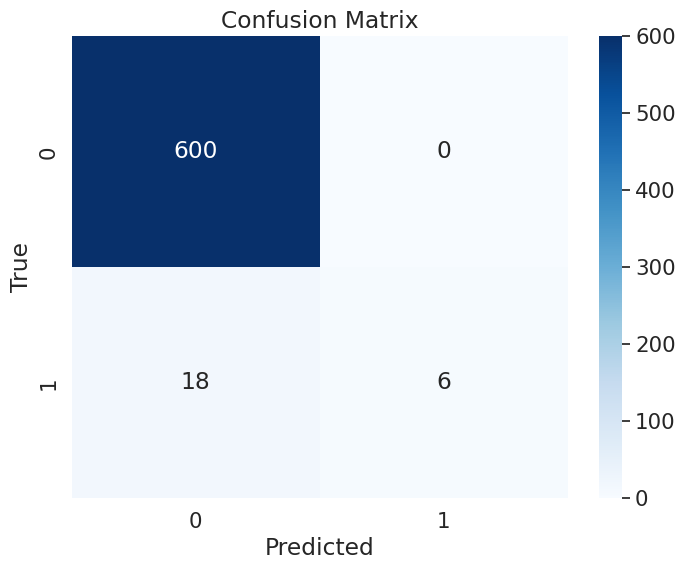

Confusion Matrix:
[[600   0]
 [ 18   6]]
Accuracy
97.11538461538461


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
# Evaluate the model and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy")
print(accuracy_score(y_test, y_pred_rf)*100)

In [ ]:
# Transform the new data using the TF-IDF vectorizer
new_data_tfidf = tfidf_vectorizer.transform(["I have not received adequate information to confirm the debt."])

# Predict the category for the new data
predicted_category = svm_classifier.predict(new_data_tfidf)

# Print the predicted category
print("Predicted Category:", predicted_category)


Predicted Category: [1]


**Comparing the following classifiers:**
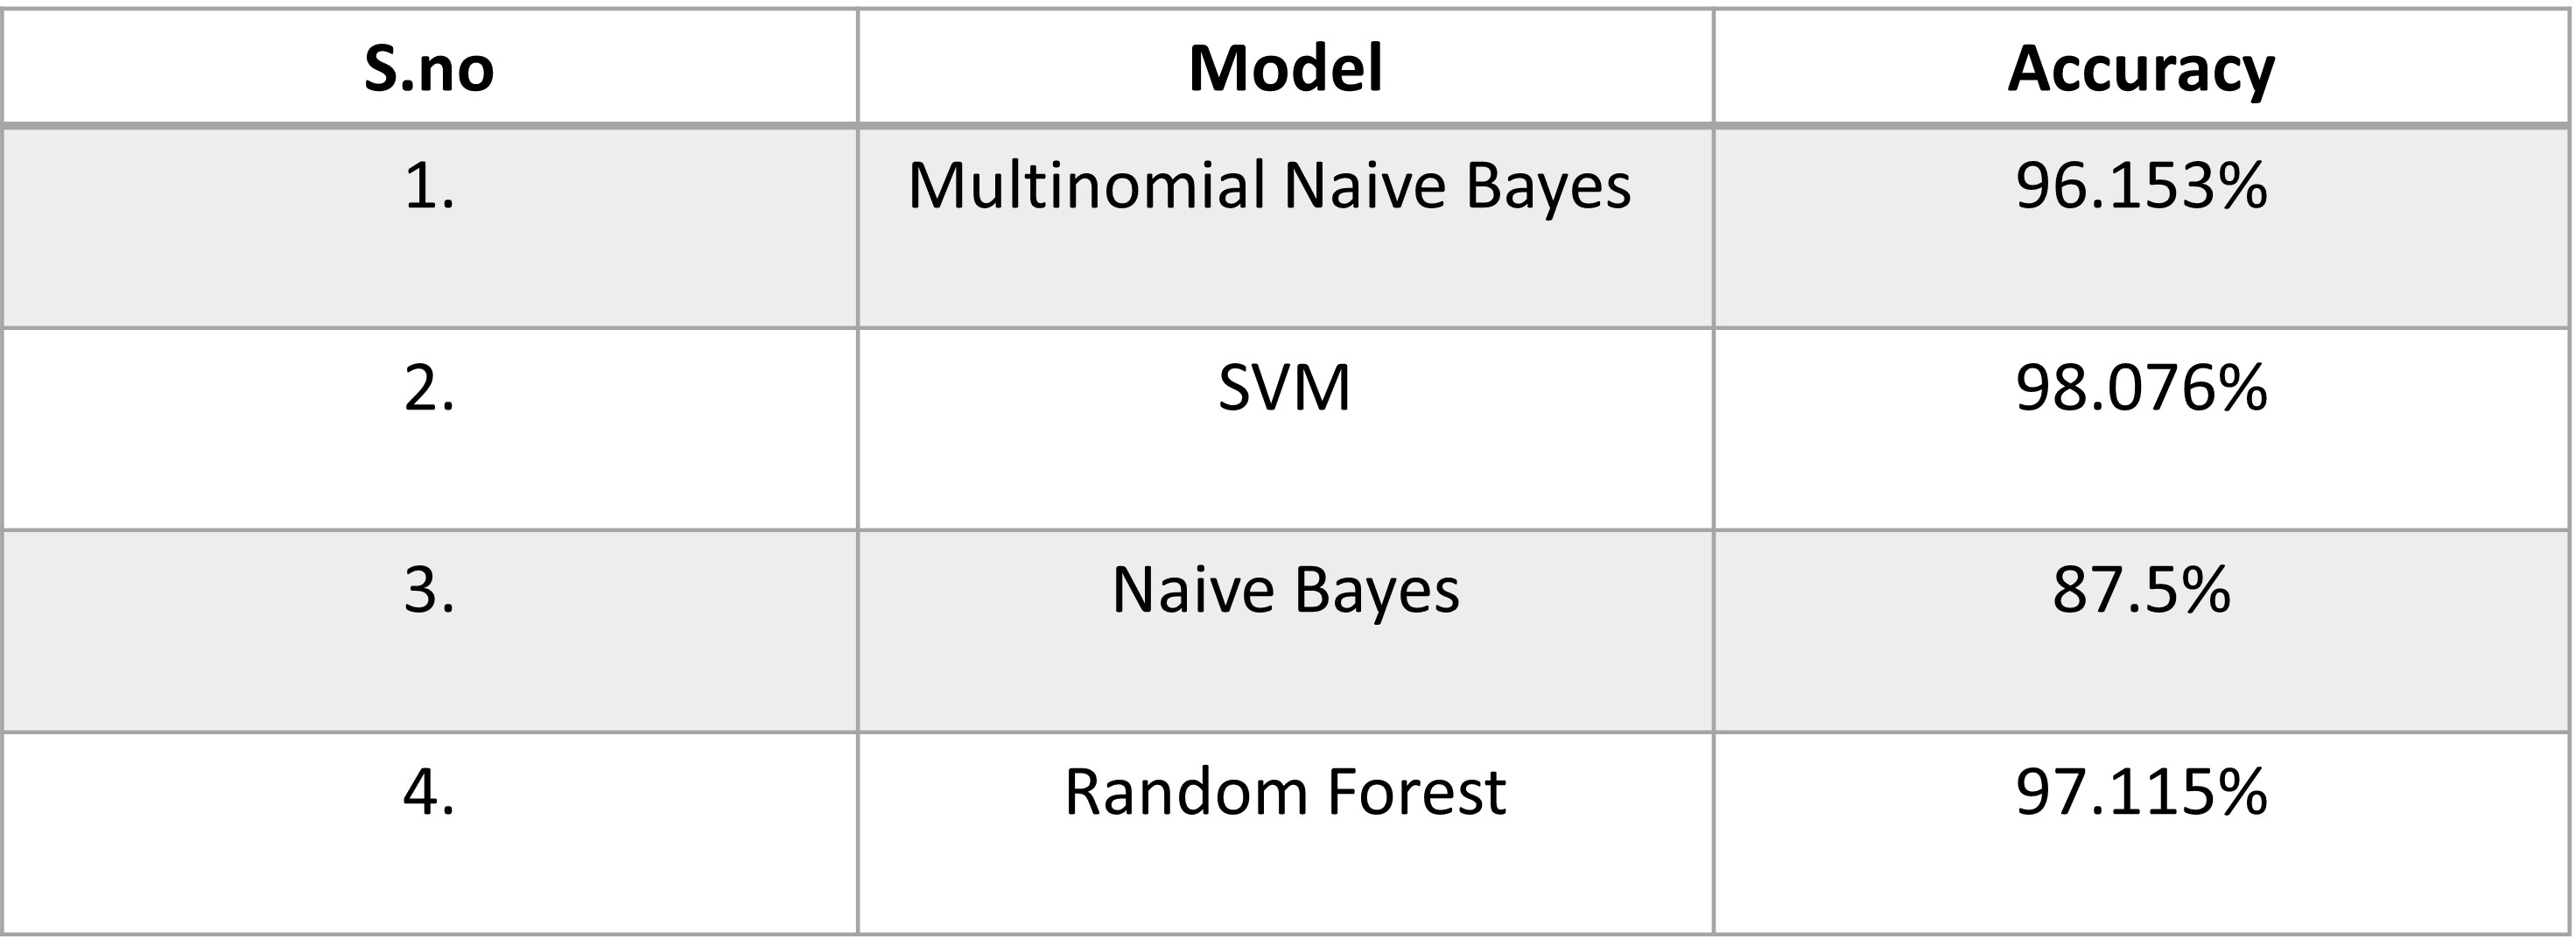
---only Naive Bayes classifier is giving 87.5% accuracy and all the other classifiers are giving more than 95% accuracy---